In [95]:
import cv2
import json
import ast
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['font.size'] = 12

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [96]:
def draw(raw_strokes, size=256, lw=6, time_color=True):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

In [97]:
def top_3_predictions(predictions):
    return np.argsort(-predictions, axis=1)[:, :3]

In [98]:
SIZE = 64
BASE_SIZE = 256
N_LABELS = 340

### DEMO EXAMPLES FROM TEST DATA

In [99]:
simplified_raw_example1 = [
    [
        [17, 18, 20, 25, 137, 174, 242, 249, 251, 255, 251, 229, 193, 166, 104, 58, 25, 13, 3], 
        [117, 176, 184, 185, 185, 190, 191, 187, 179, 122, 114, 103, 103, 109, 109, 100, 98, 103, 112]
    ], 
    [
        [64, 39, 25, 24, 37, 73, 78, 88, 91, 91, 84], 
        [117, 117, 134, 155, 177, 180, 176, 160, 148, 129, 127]
    ], 
    [
        [203, 188, 181, 175, 174, 188, 207, 219, 225, 226, 215], 
        [122, 120, 127, 137, 160, 169, 173, 161, 145, 133, 128]
    ], 
    [
        [110, 111, 151, 154, 154, 143, 108],
        [133, 150, 151, 150, 130, 127, 128]
    ], 
    [
        [0, 7, 18, 20, 28],
        [0, 10, 59, 80, 100]
    ]
]

In [100]:
simplified_raw_example2 = [
    [
        [174, 145, 106, 38, 11, 4, 4, 15, 29, 78, 169, 207, 246, 253, 255, 241, 227, 152, 123],
        [3, 0, 7, 11, 23, 36, 50, 64, 73, 84, 85, 80, 66, 60, 47, 37, 31, 14, 12]
    ], 
    [
        [1, 0, 110],
        [38, 100, 100]
    ], 
    [
        [3, 51, 87, 171, 225, 239],
        [95, 99, 107, 117, 117, 110]
    ], 
    [
        [241, 253, 251],
        [107, 60, 85]
    ], 
    [
        [217, 151, 100], 
        [113, 111, 106]
    ]
]

In [101]:
img1 = draw(simplified_raw_example1, time_color = False)
img2 = draw(simplified_raw_example2, time_color = False)

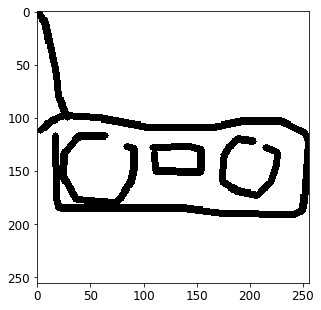

In [102]:
plt.imshow(img1, cmap='Greys')

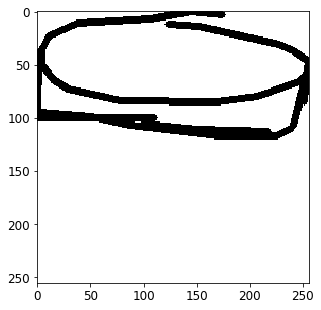

In [103]:
plt.imshow(img2, cmap='Greys')

### DEMO RAW STROKES GENERATED BY THE API

In [104]:
raw_strokes =  [[[ 27,  28,  67,  86, 114, 129, 146, 166, 178, 208, 225, 225, 222,
        194, 163, 125,  67,  52,  42,  24,  19,  19,  29],
       [101,  84,  33, 111,  95,  94, 106, 113,  79,  37, 106, 153, 161,
        192, 208, 214, 212, 206, 198, 161, 144, 124,  98]], [[132, 161, 244],
       [152, 153, 185]], [[ 73,  53,  36,  18,   9],
       [153, 153, 160, 174, 190]]]

In [105]:
x = np.zeros((1, SIZE, SIZE, 1))
x[0, :, :, 0] = draw(raw_strokes, size=SIZE, lw=6, time_color=True)
x = preprocess_input(x).astype(np.float32)

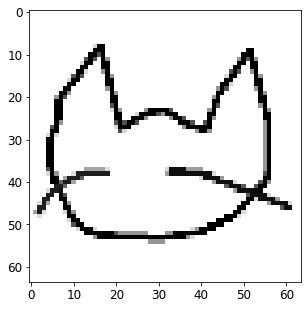

In [106]:
y = draw(raw_strokes, size=SIZE, lw=6, time_color=True)
plt.imshow(y, cmap='Greys')

In [88]:
with open ('labels', 'rb') as fp:
    labels = pickle.load(fp)

In [93]:
model = MobileNet(input_shape=(SIZE, SIZE, 1), alpha=1., weights=None, classes=N_LABELS)
model.load_weights('model.h5')

In [94]:
predictions = model.predict(x, verbose=1)
top_3_preds = top_3_predictions(predictions)
top_3_labels = [labels[prediction] for prediction in top_3_preds[0]]
top_3_labels

1/1 [==============================] - 2s 2s/sample


['cat', 'tiger', 'raccoon']